<a href="https://colab.research.google.com/github/Esbern/Python-for-Planners/blob/main/project_example/videoserver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Reinforcement Learning and Echo Chambers in Social Media Through Video Recommendation Simulation

**Introduction**

In the digital age, recommendation systems have become an essential part of our online experience. Social media platforms, video streaming services, and news aggregators rely on algorithms to suggest content based on user interactions. These algorithms often function as reinforcement learning systems, gradually adapting to user preferences. However, they also contribute to the formation of echo chambers, where users are increasingly exposed to content that aligns with their existing beliefs, limiting exposure to diverse perspectives.

This document presents a Python simulation that models a simplified video recommendation system. The simulation mirrors how recommendation engines learn from user behavior and evolve to present more personalized content over time, illustrating the feedback loop that reinforces user preferences and potentially leads to echo chambers.

## Code

### Imports

In [ ]:
import matplotlib.pyplot as plt
import itertools
import random

### Simulation Parameters

In [ ]:

NUM_VIDEOS = 1000
NUM_ITERATIONS = 1000
NUM_RECOMMENDED_VIDEOS = 10
LEARNING_RATE = 0.01  # How much the system updates per iteration
SUBTRACTION_RATE = 1 # Keep sums of weights constant if 1 will together withe LEARNING_RATE = 0.01 increase echo chamber effer efect if increased

# Topic List
topics = [
    "Sports", "Video Games", "Politics", "Music", "Movies", "Science", "Technology", "History", "Travel", "Food",
    "Health & Fitness", "Fashion", "Art", "Literature", "Business", "Finance", "Psychology", "Education", "Environment", "Space Exploration",
    "Automobiles", "Home Improvement", "DIY & Crafts", "Gardening", "Cooking", "Pets", "Comedy", "Horror", "Mystery & Crime", "Anime & Manga",
    "Fantasy & Sci-Fi", "Philosophy", "Religion", "Mythology", "Personal Development", "Relationships", "Parenting", "Photography", "Wildlife & Nature", "Extreme Sports",
    "True Crime", "Architecture", "Interior Design", "Fitness & Bodybuilding", "Entrepreneurship", "Meditation & Mindfulness", "Productivity Hacks", "Social Media Trends", "Renewable Energy", "Artificial Intelligence"
]

# Generate a list where each video is assigned a single topic
video_topics = [random.choice(topics) for _ in range(NUM_VIDEOS)]

# Define users with named topic preferences
human_list = [
    {"name": "Alice", "user": {topic: 0.5 for topic in topics}, "preferences": {"Sports": 0.8, "Video Games": 0.1, "Music": 0.9, "Travel": 0.6, "Food": 0.3}},
    {"name": "Bob", "user": {topic: 0.5 for topic in topics}, "preferences": {"Movies": 0.7, "Technology": 0.4, "History": 0.9, "Science": 0.6, "Finance": 0.8}},
    {"name": "Charlie", "user": {topic: 0.5 for topic in topics}, "preferences": {"Health & Fitness": 0.6, "Art": 0.9, "Philosophy": 0.5, "Environment": 0.7, "Psychology": 0.3}},
    {"name": "Diana", "user": {topic: 0.5 for topic in topics}, "preferences": {"Politics": 0.4, "Literature": 0.8, "Education": 0.6, "Architecture": 0.9, "Cooking": 0.7}},
    {"name": "Eve", "user": {topic: 0.5 for topic in topics}, "preferences": {"Pets": 0.9, "Fashion": 0.1, "Anime & Manga": 0.8, "Mystery & Crime": 0.6, "Wildlife & Nature": 0.7}},
]
# fill in missing values in the humans preferances
for user in human_list:
    preferences = {topic: 0.5 for topic in topics}  # Default neutral values
    for topic, value in user["preferences"].items():
        preferences[topic] = value  # Corrected: Keep topic names, not indices

    user["preferences"] = preferences  # Update user preferences



### Simulation procedures

In [ ]:
def select_videos_to_present(user_id):
    # Step 1: Select 10 topics randomly, weighted by preference values
    user_preferences = human_list[user_id]['user']
    selected_topics = random.choices(
        list(user_preferences.keys()),  # List of topic names
        weights=list(user_preferences.values()),  # Corresponding preference weights
        k=10  # Select 10 topics
    )

    # Step 2: Select one random video for each of these topics
    selected_videos = []
    for topic in set(selected_topics):  # Use set to remove duplicates
        topic_videos = [i for i, vid_topic in enumerate(video_topics) if vid_topic == topic]

        if topic_videos:  # Ensure there are videos for the topic
            selected_videos.append(random.choice(topic_videos))

    return selected_videos


def user_selects_the_best_video(user_id, recommended_videos):
    video_preferences = []  # Store (video, preference_score) pairs

    # Step 1: Compute preference score for each video
    for vid in recommended_videos:
        video_topic = video_topics[vid]  # Each video has one topic
        preference_score = human_list[user_id]['preferences'].get(video_topic, 0.5)  # Default to 0.5 if missing
        video_preferences.append((vid, preference_score))

    # Step 2: Select a video randomly, weighted by its preference score
    selected_video = random.choices(
        [vid for vid, _ in video_preferences],  # Videos
        weights=[score for _, score in video_preferences],  # Weights
        k=1  # Select 1 video
    )[0]

    return selected_video

def update_users_preferences(user_id, selected_video, recommended_videos):
    selected_topic = video_topics[selected_video]  # The topic of the chosen video


    # Step 1: Increase preference for the selected topic
    human_list[user_id]['user'][selected_topic] += LEARNING_RATE

    # Step 2: Reduce preference for rejected topics
    num_rejected = len(recommended_videos) - 1  # Number of unchosen videos

    if num_rejected > 0:  # Avoid division by zero
        reduction_value = (LEARNING_RATE / num_rejected) * SUBTRACTION_RATE  # Keep total weight sum constant if SUBTRACTION_RATE = 1

        for vid in recommended_videos:
            rejected_topic = video_topics[vid]
            if rejected_topic != selected_topic:  # Skip the chosen topic
                human_list[user_id]['user'][rejected_topic] -= reduction_value




###  Run the simulation

In [ ]:

preference_history = {idx: [] for idx in range(len(human_list))}

for iteration in range(NUM_ITERATIONS):
    for user_id in range(len(human_list)):
        recommended_videos = select_videos_to_present(user_id)
        best_video = user_selects_the_best_video(user_id, recommended_videos)
        update_users_preferences(user_id, best_video,recommended_videos)
        preference_history[user_id].append(human_list[user_id]['user'].copy())






### Plotting the result

{'Sports': 0.6208928571428615, 'Video Games': 0.356329365079366, 'Politics': 0.517996031746034, 'Music': 0.6507142857142899, 'Movies': 0.4869841269841285, 'Science': 0.48781746031746237, 'Technology': 0.5059523809523838, 'History': 0.48617063492063783, 'Travel': 0.49250000000000316, 'Food': 0.3971230158730169, 'Health & Fitness': 0.4757936507936527, 'Fashion': 0.4144841269841278, 'Art': 0.5490079365079407, 'Literature': 0.46440476190476476, 'Business': 0.5532341269841311, 'Finance': 0.4806746031746055, 'Psychology': 0.49061507936508136, 'Education': 0.52132936507937, 'Environment': 0.490337301587304, 'Space Exploration': 0.45158730158730276, 'Automobiles': 0.5126785714285754, 'Home Improvement': 0.43607142857143, 'DIY & Crafts': 0.455674603174605, 'Gardening': 0.5158531746031794, 'Cooking': 0.4443849206349222, 'Pets': 0.529742063492068, 'Comedy': 0.48593253968254213, 'Horror': 0.4907142857142884, 'Mystery & Crime': 0.5703571428571464, 'Anime & Manga': 0.4707142857142886, 'Fantasy & Sci

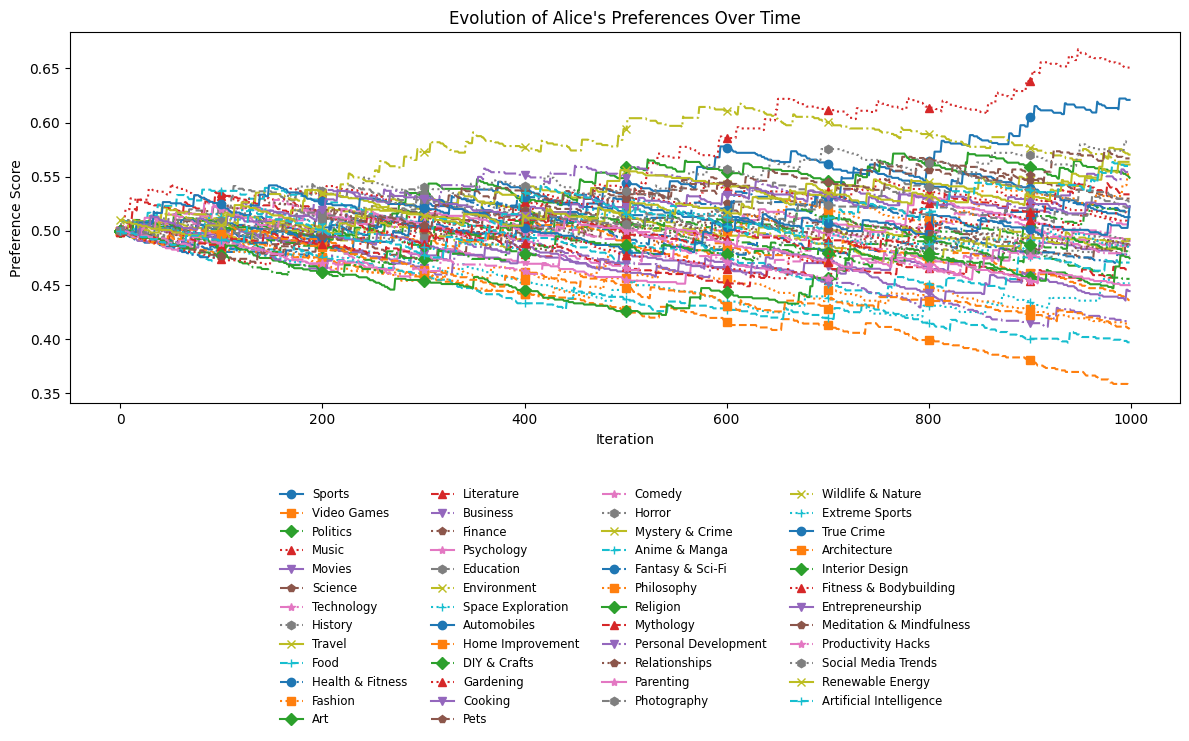

In [ ]:
# Define different line styles and markers
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', 'x', '+']
style_cycle = itertools.cycle(line_styles)
marker_cycle = itertools.cycle(markers)

# Select the user to plot
user_to_plot = 0
print(human_list[user_to_plot]["user"])  # Print the final preferences for debugging

# Create the figure
plt.figure(figsize=(12, 8))  # Increased height to fit the legend below

# Iterate through topics using the correct keys from user preferences:
for topic_name in human_list[user_to_plot]["preferences"].keys():
    values = [step.get(topic_name, 0.5) for step in preference_history[user_to_plot]]  # Use .get() to handle missing keys
    plt.plot(values, label=topic_name, linestyle=next(style_cycle), marker=next(marker_cycle), markevery=100)


# Labels and Title
plt.xlabel("Iteration")
plt.ylabel("Preference Score")
plt.title(f"Evolution of {human_list[user_to_plot]['name']}'s Preferences Over Time")

# Adjust the legend to be below the plot
plt.legend(
    loc="upper center",  # Places the legend below the plot
    bbox_to_anchor=(0.5, -0.2),  # Moves the legend down
    ncol=4,  # Organizes legend into 4 columns
    fontsize='small',
    frameon=False  # Removes legend box border for cleaner look
)

# Adjust layout to fit legend properly
plt.tight_layout()

# Show the plot
plt.show()

# Code Overview and Explanation

The simulation is structured around a set of users, each with their own preferences for different topics. The recommendation system starts with no understanding of user preferences and refines its suggestions based on user selections.

The simulation consists of three main processes:

Selecting videos to present – The system picks 10 videos for each user based on their stored preferences.

User selecting the best video – The user chooses a video based on their true preferences.

Updating user preferences – The system updates its stored knowledge of the user's preferences based on their behavior.

1. Selecting Videos to Present

The function select_videos_to_present(user_id) simulates how a recommendation system selects videos by weighting topics based on the user's known preferences. Instead of picking completely random videos, the selection process is biased toward topics the user has previously engaged with.

Code Example:

import random

def select_videos_to_present(user_id):
    user_preferences = human_list[user_id]['user']
    selected_topics = random.choices(
        list(user_preferences.keys()),
        weights=list(user_preferences.values()),
        k=10
    )
    
    selected_videos = []
    for topic in set(selected_topics):
        topic_videos = [i for i, vid_topic in enumerate(video_topics) if vid_topic == topic]
        if topic_videos:
            selected_videos.append(random.choice(topic_videos))
    
    return selected_videos

This weighted random selection process mirrors real-world recommendation engines that prioritize content with higher engagement probabilities.

2. User Selecting the Best Video

Once videos are recommended, the user selects one based on their true preferences. Instead of always choosing the highest-rated video deterministically, the function introduces a degree of randomness to better reflect real-world user behavior.

Code Example:

def user_selects_the_best_video(user_id, recommended_videos):
    video_preferences = []
    for vid in recommended_videos:
        video_topic = video_topics[vid]
        preference_score = human_list[user_id]['preferences'].get(video_topic, 0.5)
        video_preferences.append((vid, preference_score))

    selected_video = random.choices(
        [vid for vid, _ in video_preferences],
        weights=[score for _, score in video_preferences],
        k=1
    )[0]
    
    return selected_video

By making selections probabilistic, the simulation avoids overfitting to a single type of content, allowing for a more organic evolution of user preferences.

3. Updating User Preferences

Every time a user selects a video, the system updates its understanding of the user's preferences. The selected topic's preference score increases slightly, while the unchosen topics are slightly reduced. This reinforcement mechanism is a crucial element of how real-world platforms learn from user behavior.

Code Example:

def update_users_preferences(user_id, selected_video, recommended_videos):
    selected_topic = video_topics[selected_video]
    learning_rate = 0.01  

    human_list[user_id]['user'][selected_topic] += learning_rate
    num_rejected = len(recommended_videos) - 1  

    if num_rejected > 0:  
        reduction_value = learning_rate / num_rejected  
        for vid in recommended_videos:
            rejected_topic = video_topics[vid]
            if rejected_topic != selected_topic:
                human_list[user_id]['user'][rejected_topic] -= reduction_value

This approach ensures that preferences dynamically adjust over time based purely on interaction history—without requiring direct knowledge of a user’s true preferences.

Reinforcement Learning and Echo Chambers

This simulation aligns closely with reinforcement learning (RL), where the algorithm learns through trial and error to maximize reward. In this case:

The "reward" is the user’s video selection.

The "policy" is the recommendation algorithm that adjusts based on past behavior.

The risk of such a system is the emergence of echo chambers:

If the user continues selecting the same type of content, the system will reinforce this preference and narrow down recommendations.

Over time, the user is less likely to see diverse content, leading to an information bubble.

This process is evident in social media platforms where engagement-driven algorithms often amplify divisive or sensational content because users repeatedly interact with it.